# Introduction

In this notebook we demonstrate the use of **LDA (Latent Dirichlet Allocation)** generative statistical model for Information Retrieval technique to make trace link recovery between Test Cases and Bug Reports.

We model our study as follows:

* Each bug report title, summary and description compose a single query.
* We use each test case content as an entire document that must be returned to the query made

# Import Libraries

In [7]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import pprint

from modules.models_runner.feat_br_models_runner import Feat_BR_Models_Runner
from modules.utils import aux_functions
from modules.utils import model_evaluator as m_eval
from modules.utils import firefox_dataset_p2 as fd
from modules.utils import similarity_measures as sm
from modules.utils import br_feat_final_matrix_handler as b2f_handler

from matplotlib import pyplot as plt

import warnings; warnings.simplefilter('ignore')

# Load Datasets

In [8]:
bugreports = fd.Datasets.read_selected_bugreports_df()
features = fd.Datasets.read_features_df()

SelectedBugReports.shape: (91, 18)
Features.shape: (21, 8)


# Running LDA Model - Exp-Vol UNION Oracle

In [9]:
models_runner_1 = Feat_BR_Models_Runner()

lda_model_1 = models_runner_1.run_lda_model()

evaluator_1 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_union_df().T)

sim_thresh = 0.0

lda_eval_t1 = evaluator_1.evaluate_model(model=lda_model_1, top_value=1, sim_threshold=sim_thresh)
lda_eval_t3 = evaluator_1.evaluate_model(model=lda_model_1, top_value=3, sim_threshold=sim_thresh)
lda_eval_t5 = evaluator_1.evaluate_model(model=lda_model_1, top_value=5, sim_threshold=sim_thresh)
lda_eval_t10 = evaluator_1.evaluate_model(model=lda_model_1, top_value=10, sim_threshold=sim_thresh)

Features.shape: (21, 8)
SelectedBugReports.shape: (91, 18)
Running LDA model -----
Expert and Volunteers Matrix UNION.shape: (91, 21)


# Similarity Matrix

In [10]:
aux_functions.highlight_df(lda_model_1.get_sim_matrix().iloc[0:23, 0:14])

Bug_Number,1248267,1248268,1257087,1264988,1267480,1267501,1269348,1269485,1270274,1270983,1271607,1276120,1277937,1278388
feat_name,,,,,,,,,,,,,,
new_awesome_bar,0.822464,0.84512,0.93454,0.809613,0.984298,0.849872,0.868375,0.80522,0.874157,0.827736,0.935785,0.943071,0.929802,0.980799
windows_child_mode,0.278576,0.449097,0.302384,0.630708,0.379784,0.360606,0.529093,0.551058,0.356729,0.149225,0.391333,0.361615,0.554503,0.168133
apz_async_scrolling,0.0608286,0.155969,0.207319,0.155284,0.0867827,0.482821,0.127174,0.438422,0.463708,0.195938,0.277656,0.206732,0.177698,0.198685
browser_customization,0.817867,0.830518,0.929312,0.784044,0.974596,0.840958,0.849337,0.784794,0.865993,0.831262,0.92571,0.934253,0.909384,0.983051
pdf_viewer,0.281083,0.208148,0.231773,0.199582,0.246156,0.247359,0.215232,0.199998,0.222598,0.214254,0.234148,0.258523,0.244942,0.241892
context_menu,0.847533,0.777545,0.66724,0.681945,0.422576,0.595231,0.696118,0.641328,0.557831,0.820607,0.58786,0.630255,0.453016,0.408015
w10_comp,0.815923,0.828604,0.927764,0.781865,0.973367,0.838794,0.847353,0.782292,0.863648,0.829085,0.923795,0.932811,0.907844,0.982367
tts_in_desktop,0.230407,0.23238,0.259295,0.222186,0.275264,0.236096,0.239979,0.222407,0.247592,0.238292,0.261289,0.25879,0.254819,0.27167
tts_in_rm,0.221529,0.275183,0.392815,0.213713,0.26457,0.628166,0.230758,0.518028,0.617389,0.394595,0.438973,0.377918,0.291131,0.43396


# Analysis of BR x Feat Generated Traces

In [11]:
handler = b2f_handler.BR_Feat_Final_Matrix_Handler(mode=b2f_handler.HandlerMode.LOAD)
br_2_features_matrix_final = handler.add_mappings_1(columns_names=['Features_IDs_lda_t1_m',
                                                                   'Features_IDs_lda_t3_m',
                                                                   'Features_IDs_lda_t5_m',
                                                                   'Features_IDs_lda_t10_m',
                                                                   'Features_IDs_orc'],
                                                    trace_matrices=[lda_eval_t1['trace_links_df'],
                                                                    lda_eval_t3['trace_links_df'],
                                                                    lda_eval_t5['trace_links_df'],
                                                                    lda_eval_t10['trace_links_df'],
                                                                    evaluator_1.get_oracle_df()],
                                                    is_from_model=True)

br_2_features_matrix_final = handler.add_mappings_2(dest_columns_names=['f_names_lda_t1',
                                                                        'f_names_lda_t3',
                                                                        'f_names_lda_t5',
                                                                        'f_names_lda_t10',
                                                                        'f_names_orc'],
                                                   orig_columns_names=['Features_IDs_lda_t1_m',
                                                                       'Features_IDs_lda_t3_m',
                                                                       'Features_IDs_lda_t5_m',
                                                                       'Features_IDs_lda_t10_m',
                                                                       'Features_IDs_orc'])
br_2_features_matrix_final.head(10)

SelectedBugReports.shape: (91, 18)
Features.shape: (21, 8)
BR_2_Features Matrix Final.shape: (91, 5)


,bug_title,Features_IDs_exp_m,Features_IDs_vol_m,Features_IDs_exp_vol_union_m,Features_IDs_exp_vol_intersec_m,Features_IDs_lda_t1_m,Features_IDs_lda_t3_m,Features_IDs_lda_t5_m,Features_IDs_lda_t10_m,Features_IDs_orc,f_names_lda_t1,f_names_lda_t3,f_names_lda_t5,f_names_lda_t10,f_names_orc
Bug_Number,,,,,,,,,,,,,,,
1248267,"Right click on bookmark item of ""Recently Book...",6,6,6,6,6,1 6 16,1 4 6 10 16,1 4 6 7 10 12 14 16 18 20,6,[[context_menu]],"[[new_awesome_bar], [context_menu], [webgl2]]","[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [browser_customization], [...",[[context_menu]]
1248268,"Unable to disable ""Recently bookmarked""",,4,4,,1,1 4 16,1 4 10 16 20,1 4 6 7 10 12 14 16 18 20,4,[[new_awesome_bar]],"[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [browser_customization], [...",[[browser_customization]]
1257087,Middle mouse click on history item would not open,,,,,1,1 4 16,1 4 10 16 20,1 4 6 7 10 12 14 16 18 20,,[[new_awesome_bar]],"[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [browser_customization], [...",[]
1264988,Scrollbar appears for a moment in the new Awes...,1,1,1,1,1,1 4 16,1 4 10 16 20,1 2 4 6 7 10 11 16 18 20,1,[[new_awesome_bar]],"[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [windows_child_mode], [bro...",[[new_awesome_bar]]
1267480,Intermittent browser/components/preferences/in...,,,,,1,1 4 16,1 4 10 16 20,1 2 4 6 7 10 14 16 18 20,,[[new_awesome_bar]],"[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [windows_child_mode], [bro...",[]
1267501,New Private Browsing start-page overflows off ...,3,,3,,1,1 4 16,1 4 10 16 20,1 4 6 7 9 10 14 16 18 20,3,[[new_awesome_bar]],"[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [browser_customization], [...",[[apz_async_scrolling]]
1269348,Show last sync date tooltip on Synced Tabs sid...,,,,,1,1 4 16,1 4 10 16 20,1 2 4 6 7 10 12 16 18 20,,[[new_awesome_bar]],"[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [windows_child_mode], [bro...",[]
1269485,New Private Browsing start-page has white/gray...,3,,3,,1,1 4 16,1 4 10 16 20,1 2 4 6 7 10 11 16 18 20,3,[[new_awesome_bar]],"[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [windows_child_mode], [bro...",[[apz_async_scrolling]]
1270274,Intermittent browser_share.jsuncaught exceptio...,,,,,1,1 4 16,1 4 10 16 20,1 4 6 7 9 10 14 16 18 20,,[[new_awesome_bar]],"[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [browser_customization], [...",[]


# Analysis of Precision and Recall

Evaluating LDA Model ----- 


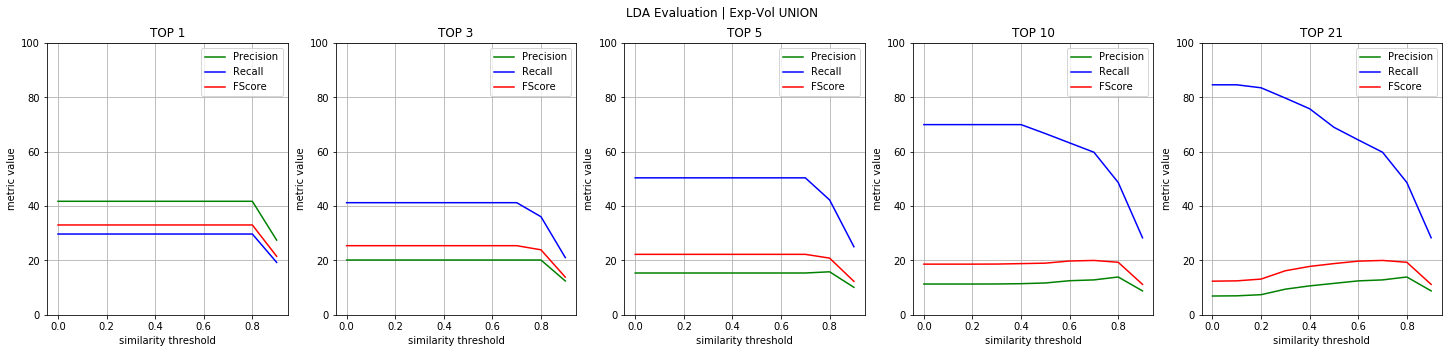

In [12]:
results = evaluator_1.run_evaluator(models=[lda_model_1], top_values=[1,3,5,10,21], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_1.plot_evaluations_2(title='LDA Evaluation | Exp-Vol UNION', results=results)

# Analysis of False Positives

# Analysis of False Negatives